# **Animal Crossing: New Horizons**

> **Opis projekta**

U ovome projektu analiziran je katalog svih entiteta igre **Animal Crossing: New Horizons** (source: https://www.kaggle.com/datasets/jessicali9530/animal-crossing-new-horizons-nookplaza-dataset?resource=download)

Dataset podrazumijeva 30 datoteka s podacima o likovima, predmetima, namještaju, insektima, odjeći itd.
Svaka datoteka, odnosno entitet, ima stupce koji podrazumijevaju njihove karakteristike - vrsta, spol, boja, cijena, dostupnost, ...

<br>

**U sklopu analize ovog dataseta, postavljam pitanja:**
1. Zastupljenost likova (NPC-jeva)?
2. Jesu li neke osobnosti zastupljenije kod jednog spola?
3. Mjesec u kojem najviše likova ima rođendan?
4. Koje vrste predmeta su najzastupljenije u katalogu?
5. Kako su raspodijeljene cijene predmeta?
6. Predmeti najneisplativiji za prodaju?
7. Koje boje predmeta su najzastupljenije?
8. Može li se iz podataka izvući grupa sličnih likova prema karakteristikama? Na temelju čega su slični?
9. Koje kombinacije više atributa (npr. boja + tip predmeta) najčešće postoje?
10. Postoje li outlieri odnosno bilo kakvi entiteti koji značajno odskaču cijenom/karakteristikama?

<br>

**Sadržaj:**
1. Konfiguracija
2. Pregled podataka
3. Eksploratorna analiza (EDA)<br>
   3.1 Villagers<br>
   3.2 Predmeti
4. NLP analiza tekstualnih atributa
5. Grupiranje i analiza sličnosti
6. Outlieri
7. Zaključak

## **1. Konfiguracija**

In [191]:
# import json

# kaggle_json = {
#     "username": "[YOUR_ACCOUNT]",
#     "key": "[YOUR_TOKEN]"
# }

# with open("kaggle.json", "w") as f:
#     json.dump(kaggle_json, f)

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/PMF/UPZ/projekt/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [194]:
!kaggle datasets list | head

ref                                                            title                                               size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                            Chocolate Sales                                   468320  2026-01-04 14:23:35.490000          15034        266  1.0              
aliiihussain/amazon-sales-dataset                              Amazon_Sales_Dataset                             1297759  2026-02-01 11:37:12.353000           2386         48  1.0              
hassanjameelahmed/store-sales                                  Retail Store Sales                                 66677  2026-02-04 06:31:47.217000            670         27  1.0              
wardabilal/customer-shopping-behavi

In [195]:
!kaggle datasets download -d jessicali9530/animal-crossing-new-horizons-nookplaza-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/animal-crossing-new-horizons-nookplaza-dataset
License(s): CC0-1.0
animal-crossing-new-horizons-nookplaza-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [196]:
!unzip animal-crossing-new-horizons-nookplaza-dataset.zip -d acnh_data

Archive:  animal-crossing-new-horizons-nookplaza-dataset.zip
replace acnh_data/accessories.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/achievements.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/art.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/bags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/bottoms.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/construction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/dress-up.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/fencing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/fish.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/floors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/fossils.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/headwear.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace acnh_data/housewares.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 

In [197]:
# importi

import os

import re

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

from collections import Counter

## **2. Pregled podataka**

In [198]:
data_path = "acnh_data"
datasets = {}

for file in os.listdir(data_path):
  if file.endswith(".csv"):
    name = file.replace(".csv", "")
    datasets[name] = pd.read_csv(os.path.join(data_path, file))

print("Broj tablica:", len(datasets))

Broj tablica: 30


In [199]:
summary = []

for name, df in datasets.items():
  summary.append({
      "tablica": name,
      "broj_redaka": df.shape[0],
      "broj_stupaca": df.shape[1]
    })

summary_df = pd.DataFrame(summary).sort_values("broj_redaka", ascending=False)
summary_df

,tablica,broj_redaka,broj_stupaca
20,housewares,3275,32
15,wall-mounted,3275,31
24,photos,3128,20
23,miscellaneous,1307,31
28,tops,1121,21
25,dress-up,913,22
6,bottoms,726,20
26,headwear,698,22
13,recipes,595,24
7,shoes,454,21


## **3. Eksploratorna analiza (EDA)**

### **3.1 Villagers**

In [200]:
villagers = datasets["villagers"]
villagers.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


In [201]:
villagers.shape[0]

391

> **Zastupljenost villagera po vrsti**

In [202]:
species_count = villagers["Species"].value_counts()
species_count

,count
Species,
Cat,23
Rabbit,20
Squirrel,18
Frog,18
Duck,17
Dog,16
Cub,16
Bear,15
Pig,15


> **Zastupljenost villagera po spolu**

In [203]:
gender_count = villagers["Gender"].value_counts()
gender_count

,count
Gender,
Male,204
Female,187


> **Zastupljenost villagera po karakteru**

In [204]:
character_count = villagers["Personality"].value_counts()
character_count

,count
Personality,
Lazy,60
Normal,59
Snooty,55
Cranky,55
Jock,55
Peppy,49
Smug,34
Big Sister,24


> **Zastupljenost villagera po hobiju**

In [205]:
hobby_count = villagers["Hobby"].value_counts()
hobby_count

,count
Hobby,
Nature,66
Fitness,66
Fashion,66
Play,65
Education,64
Music,64


> **Zastupljenost osobnosti prema spolu**

In [206]:
personality_gender = pd.crosstab(
    villagers["Personality"],
    villagers["Gender"],
    normalize="index"
) * 100

personality_gender.round(2)

Gender,Female,Male
Personality,,
Big Sister,100.0,0.0
Cranky,0.0,100.0
Jock,0.0,100.0
Lazy,0.0,100.0
Normal,100.0,0.0
Peppy,100.0,0.0
Smug,0.0,100.0
Snooty,100.0,0.0


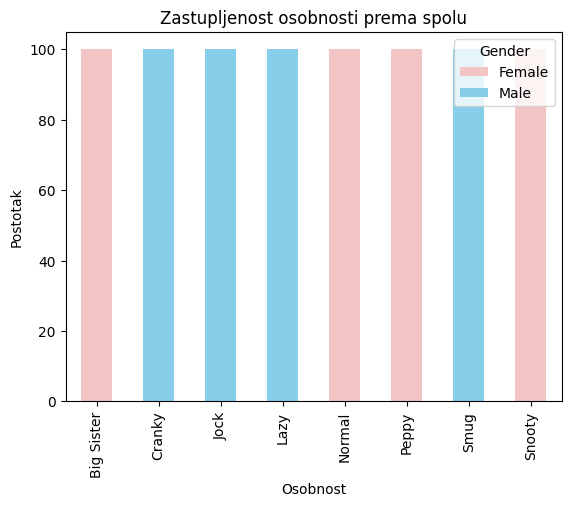

In [207]:
personality_gender.plot(
    kind="bar",
    stacked=True,
    color=["#f2c4c4", "#87CEEB"]
)

plt.title("Zastupljenost osobnosti prema spolu")
plt.xlabel("Osobnost")
plt.ylabel("Postotak")
plt.show()

**Komentar:**

Da, izgleda da je svaka osobnost specificna za samo jedan od spolova, primjerice nepostoji "cranky" villager zenskog spola.

In [208]:
villagers["Birthday"].head()

,Birthday
0,27-Jan
1,2-Jul
2,21-Apr
3,18-Oct
4,9-Jun


> **Mjesec u kojem najvise likova ima rodendan**

In [209]:
villagers["birth_month"] = villagers["Birthday"].str.split("-").str[1]
birth_month_count = villagers["birth_month"].value_counts()

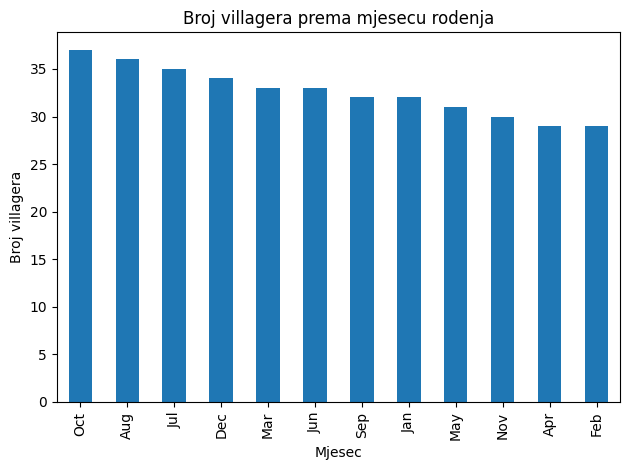

In [210]:
birth_month_count.plot(
    kind="bar"
)

plt.title("Broj villagera prema mjesecu rodenja")
plt.xlabel("Mjesec")
plt.ylabel("Broj villagera")
plt.tight_layout()
plt.show()

In [211]:
birth_month_count.Oct

np.int64(37)

**Komentar:**
    
Navjise villagera je rodeno u listopadu, i to njih tocno 37, iako dosta su cak ravnomjerno raspodijeljeni.

### **3.2 Predmeti**

In [212]:
summary_df

,tablica,broj_redaka,broj_stupaca
20,housewares,3275,32
15,wall-mounted,3275,31
24,photos,3128,20
23,miscellaneous,1307,31
28,tops,1121,21
25,dress-up,913,22
6,bottoms,726,20
26,headwear,698,22
13,recipes,595,24
7,shoes,454,21


> **Najzastupljenije vrste predmeta u katalogu**

In [213]:
categories = {
    "Housewares": datasets["housewares"],
    "Wall-mounted": datasets["wall-mounted"],
    "Photos": datasets["photos"],
    "Miscellaneous": datasets["miscellaneous"],
    "Posters": datasets["posters"],
    "Wallpaper": datasets["wallpaper"],
    "Construction": datasets["construction"],
    "Accessories": datasets["accessories"],
    "Tools": datasets["tools"],
    "Floors": datasets["floors"],
    "Rugs": datasets["rugs"],
    "Bags": datasets["bags"],
    "Art": datasets["art"],
    "Umbrellas": datasets["umbrellas"]
}

In [214]:
category_count = {
    name: df.shape[0]
    for name, df in categories.items()
}

category_count

{'Housewares': 3275,
 'Wall-mounted': 3275,
 'Photos': 3128,
 'Miscellaneous': 1307,
 'Posters': 452,
 'Wallpaper': 247,
 'Construction': 236,
 'Accessories': 222,
 'Tools': 200,
 'Floors': 176,
 'Rugs': 132,
 'Bags': 96,
 'Art': 70,
 'Umbrellas': 67}

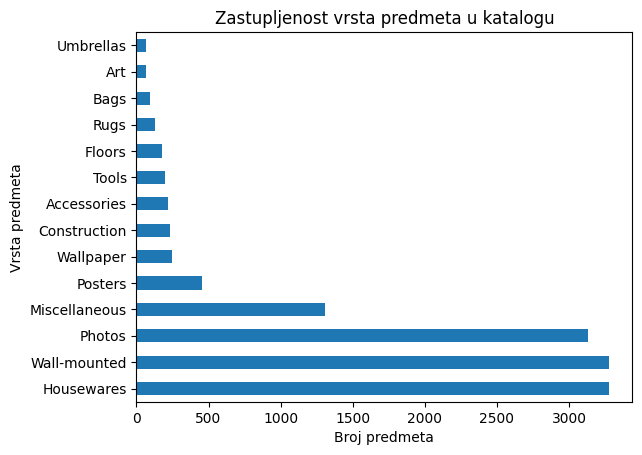

In [215]:
category_counts_df = (
    pd.DataFrame.from_dict(category_count, orient="index", columns=["Broj predmeta"])
    .sort_values("Broj predmeta", ascending=False)
)

category_counts_df.plot(
    kind="barh",
    legend=False
)

plt.title("Zastupljenost vrsta predmeta u katalogu")
plt.xlabel("Broj predmeta")
plt.ylabel("Vrsta predmeta")
plt.show()

In [216]:
housewares = datasets["housewares"]
housewares["Tag"].unique().tolist()

['Musical Instrument',
 'Fan',
 'Hospital',
 'Seaside',
 'Vehicle',
 'Bed',
 'Desk',
 'Chair',
 'Clock',
 'Table',
 'Dresser',
 'Chest',
 'Bathroom Things',
 'Toy',
 'Ranch',
 'Space',
 'Home Appliances',
 'Japanese Style',
 'Sofa',
 'Lamp',
 'Screen',
 'Shelf',
 'Audio',
 'Outdoors Decor',
 'Sports',
 'Seasonal Decor',
 'Garden',
 'Animal',
 'Fireplace',
 'Plants',
 'Compass',
 'Kitchen',
 'Arch',
 'Easter',
 'Kitchen Things',
 'Shop',
 'School',
 'Bathtub',
 'Supplies',
 'Work Bench',
 'Facility Decor',
 'Playground',
 'Toilet',
 'Insect',
 'TV',
 'Folk Craft Decor',
 'Fish',
 'Sewing Table',
 'Heating',
 'Study',
 'Office',
 'Museum']

In [217]:
wall_mounted = datasets["wall-mounted"]
wall_mounted["Tag"].unique().tolist()

['Air Conditioning',
 'Home Appliances',
 'Study',
 'Plants',
 'Bathroom Things',
 'House Door Decor',
 'Toy',
 'Museum',
 'Supplies',
 'Lamp',
 'Clock',
 'Special Fish',
 'Animal',
 'Facility Decor',
 'Seaside',
 'Special Insect',
 'Japanese Style',
 'Shelf',
 'Sculpture',
 'Kitchen Things',
 'Seasonal Decor',
 'Shop',
 'Heating',
 'Bathtub',
 'Ranch',
 'Space',
 'TV',
 nan]

**Komentar:**

Na grafu se vidi kako najvise ima predmeta koji spadaju u "housewares" ili "wall-mounted" kategporiju. obje kategorije imaju ukupan broj predmeta cak 3275. daljnjim istrazivanjem tih kategorije mozemo vidjeti da se radi o svakakvim kucanskim objektima poput stolica, igracaka, lampi, kuhinjskih preparata, ...

> **Cijene predmeta**

In [218]:
tables = [
    housewares,
    wall_mounted,
    datasets["photos"],
    datasets["miscellaneous"],
    datasets["posters"],
    datasets["wallpaper"],
    datasets["construction"],
    datasets["accessories"],
    datasets["tools"],
    datasets["floors"],
    datasets["rugs"],
    datasets["bags"],
    datasets["art"],
    datasets["umbrellas"]
]

all_items = pd.concat(tables, ignore_index=True)
all_items["Buy_numeric"] = pd.to_numeric(all_items["Buy"], errors="coerce")
all_items_prices = all_items[["Name", "Buy_numeric"]].dropna()

In [219]:
stats = all_items_prices["Buy_numeric"].describe()
stats

,Buy_numeric
count,4671.000000
mean,8971.076857
std,26193.216930
min,40.000000
25%,1000.000000
50%,1800.000000
75%,4400.000000
max,260000.000000


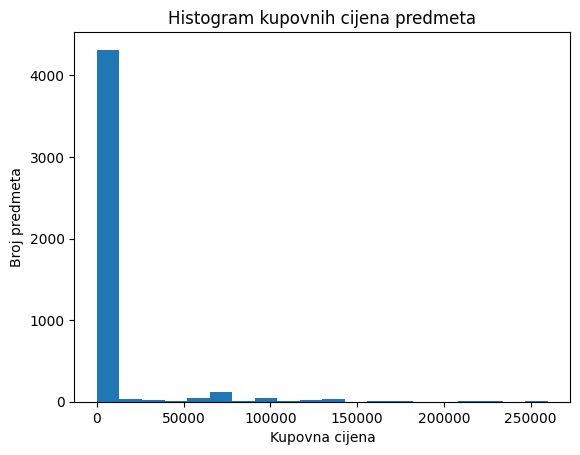

In [220]:
plt.figure()
plt.hist(all_items_prices["Buy_numeric"], bins=20)
plt.xlabel("Kupovna cijena")
plt.ylabel("Broj predmeta")
plt.title("Histogram kupovnih cijena predmeta")
plt.show()

In [221]:
cheapest_items = all_items_prices.sort_values("Buy_numeric").head(1)
most_expensive_items = all_items_prices.sort_values("Buy_numeric", ascending=False).head(1)

cheapest_items, most_expensive_items

(           Name  Buy_numeric
 12341  worn axe         40.0,
              Name  Buy_numeric
 1199  grand piano     260000.0)

**Komentar:**

Prosjecna je cijena 8971 bells (novac u igri), dok je medijan 1800 bells. dakle, vecina je predmeta jeftinija od prosjekta, sto mozemo vidjeti na histogramu. To je i ocekivano zbog skupih stvari koje ga podizu, pa je standardna devijacija je iz tog razloga dosta visoka sto potvrduje postojanje ekstremnih outliera. Vidimo da je najveci outlier zapravo klavir po cijeni od 260000 bells.

>**Predmeti najneisplativiji za prodaju**

In [222]:
all_items["Sell_numeric"] = pd.to_numeric(all_items["Sell"], errors="coerce")
all_items_prices = all_items[["Name", "Buy_numeric", "Sell_numeric"]].dropna()

all_items_prices["profit_ratio"] = all_items_prices["Sell_numeric"] / all_items_prices["Buy_numeric"]
unique_items = all_items_prices.drop_duplicates(subset="Name").copy()

unique_items["profit_ratio"] = unique_items["Sell_numeric"] / unique_items["Buy_numeric"]

least_profitable = unique_items[unique_items["Sell_numeric"] > 0].sort_values("profit_ratio").head(10)
least_profitable

,Name,Buy_numeric,Sell_numeric,profit_ratio
11563,misty-garden wall,3000.0,585.0,0.195000
9847,cat grass,570.0,141.0,0.247368
10281,magazine,210.0,52.0,0.247619
9877,coffee cup,270.0,67.0,0.248148
9789,book,290.0,72.0,0.248276
10934,unfinished puzzle,290.0,72.0,0.248276
10147,homework set,330.0,82.0,0.248485
10102,glass holder with candle,350.0,87.0,0.248571
9764,beach ball,430.0,107.0,0.248837
10717,sewing project,430.0,107.0,0.248837


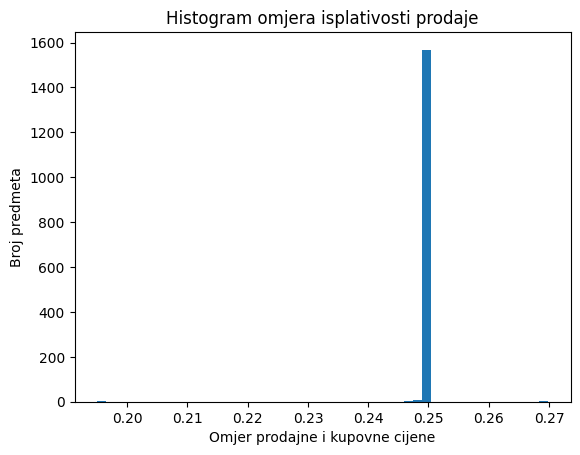

In [223]:
plt.figure()
plt.hist(unique_items["profit_ratio"], bins=50)
plt.xlabel("Omjer prodajne i kupovne cijene")
plt.ylabel("Broj predmeta")
plt.title("Histogram omjera isplativosti prodaje")
plt.show()

**Komentar:**

Dobili smo uvid u 10 najmanje isplativnih predmeta za prodaju. Prvi, "misty-garden wall" dostupan je za kupnju po cijeni od 3000 bells, a za povrat igrac dobije samo 585 bells. U histogramu vidimo da velika vecina predmeta ima omjer prodajne i kupovne cijene 0.25, sto znaci da se prodajom dobije 1/4 kupovne cijene - dok je omjer za "misty garden wall" samo 0.19.

>**Najzastupljenije boje**

In [224]:
colors = all_items[["Name", "Color 1", "Color 2"]].copy()
all_colors = pd.concat([colors["Color 1"], colors["Color 2"]]).dropna()
color_counts = all_colors.value_counts()

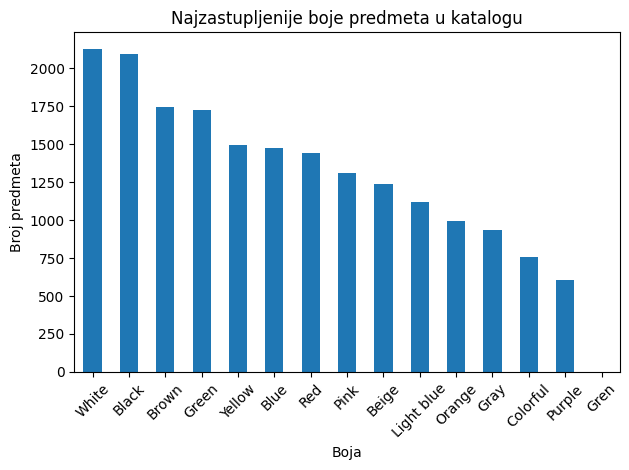

In [225]:
color_counts.head(15).plot(
    kind="bar"
)

plt.title("Najzastupljenije boje predmeta u katalogu")
plt.xlabel("Boja")
plt.ylabel("Broj predmeta")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Komentar:**

Prema grafu mozemo zakljuciti da je bijela najzastupljenija boja za predmete.

## **4. Grupiranje i analiza sličnosti**

In [226]:
villagers.head(1)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,birth_month
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3,Jan


>**Moze li se iz podataka izvuci grupa slicnih likova prema karakteristikama? Na temelju cega su slicni?**

In [227]:
features = ["Species", "Gender", "Personality", "Hobby"]
villagers_features = villagers[features].copy()
villagers_encoded = pd.get_dummies(villagers_features, drop_first=True)

In [228]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
villagers_features["cluster"] = kmeans.fit_predict(villagers_encoded)

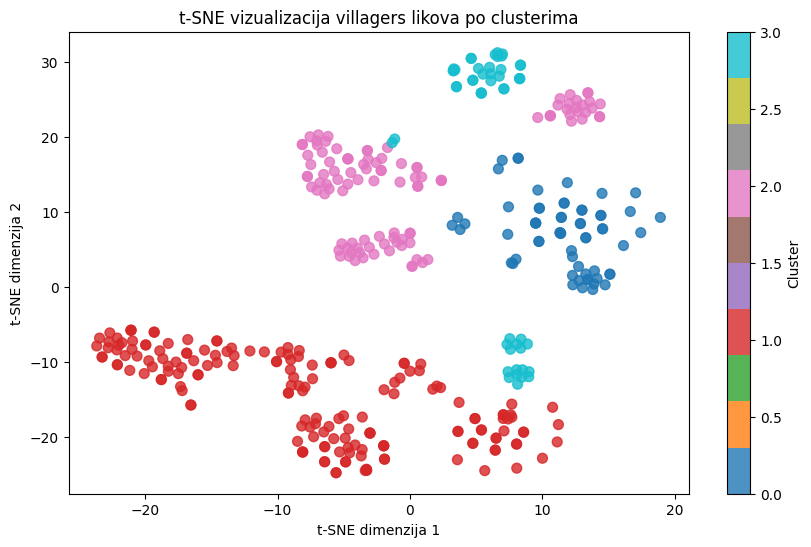

In [229]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
    init="pca",
    learning_rate="auto"
)

villagers_tsne = tsne.fit_transform(villagers_encoded)

plt.figure(figsize=(10,6))
plt.scatter(
    villagers_tsne[:, 0],
    villagers_tsne[:, 1],
    c=villagers_features["cluster"],
    cmap="tab10",
    s=50,
    alpha=0.8
)

plt.title("t-SNE vizualizacija villagers likova po clusterima")
plt.xlabel("t-SNE dimenzija 1")
plt.ylabel("t-SNE dimenzija 2")
plt.colorbar(label="Cluster")
plt.show()

In [230]:
cluster_summary = villagers_features.groupby("cluster").agg(
    personality=("Personality", lambda x: x.value_counts().idxmax()),
    species=("Species", lambda x: x.value_counts().idxmax()),
    gender=("Gender", lambda x: x.value_counts().idxmax()),
    hobby=("Hobby", lambda x: x.value_counts().idxmax()),
    count=("Personality", "count")
)

cluster_summary

,personality,species,gender,hobby,count
cluster,,,,,
0,Jock,Frog,Male,Fitness,63
1,Normal,Cat,Female,Fashion,171
2,Cranky,Bear,Male,Nature,107
3,Lazy,Cub,Male,Play,50


**Komentar:**

Buduci da smo modelu postavili 4 clustera, formirane su 4 skupine koje spajaju neke najcesce kombinirane karakteristike.

- **Cluster 0** navodi da su većina likova u toj skupini cranky, muški, žabe, te imaju hobi fitness.

- **Cluster 1** navodi da su većina likova u toj skupini lazy, muški, vrste cub i hobija play. ovo je takoder najveci cluster.

- **Cluster 2** navodi da su većina likova u toj skupini normal, ženski, mačke, s hobijem music.

- **Cluster 3** navodi da su većina likova u toj skupini snooty, ženski, zečevi, s hobijem fashoin.


## **5. NLP analiza tekstualnih atributa**




In [231]:
all_items.columns

Index(['Name', 'Variation', 'Body Title', 'Pattern', 'Pattern Title', 'DIY',
       'Body Customize', 'Pattern Customize', 'Kit Cost', 'Buy', 'Sell',
       'Color 1', 'Color 2', 'Size', 'Miles Price', 'Source', 'Source Notes',
       'Version', 'HHA Concept 1', 'HHA Concept 2', 'HHA Series', 'HHA Set',
       'Interact', 'Tag', 'Outdoor', 'Speaker Type', 'Lighting Type',
       'Catalog', 'Filename', 'Variant ID', 'Internal ID', 'Unique Entry ID',
       'Door Deco', 'Customize', 'VFX', 'VFX Type', 'Window Type',
       'Window Color', 'Pane Type', 'Curtain Type', 'Curtain Color',
       'Ceiling Type', 'Category', 'Seasonal Availability', 'Mannequin Piece',
       'Style', 'Label Themes', 'Type', 'Villager Equippable', 'Uses',
       'Stack Size', 'Set', 'Genuine', 'Real Artwork Title', 'Artist',
       'Museum Description', 'Buy_numeric', 'Sell_numeric'],
      dtype='object')

>**Koje kombinacije vise atributa (npr. tip predmeta + boja) najcesce postoje?**

In [232]:
items_tc = all_items.dropna(subset=["Color 1", "Type"]).copy()
items_tc["Type_Color"] = (items_tc["Type"] + " .......... " + items_tc["Color 1"])

combo_counts = Counter(items_tc["Type_Color"])
top_combos = combo_counts.most_common(10)

labels, counts = zip(*top_combos)

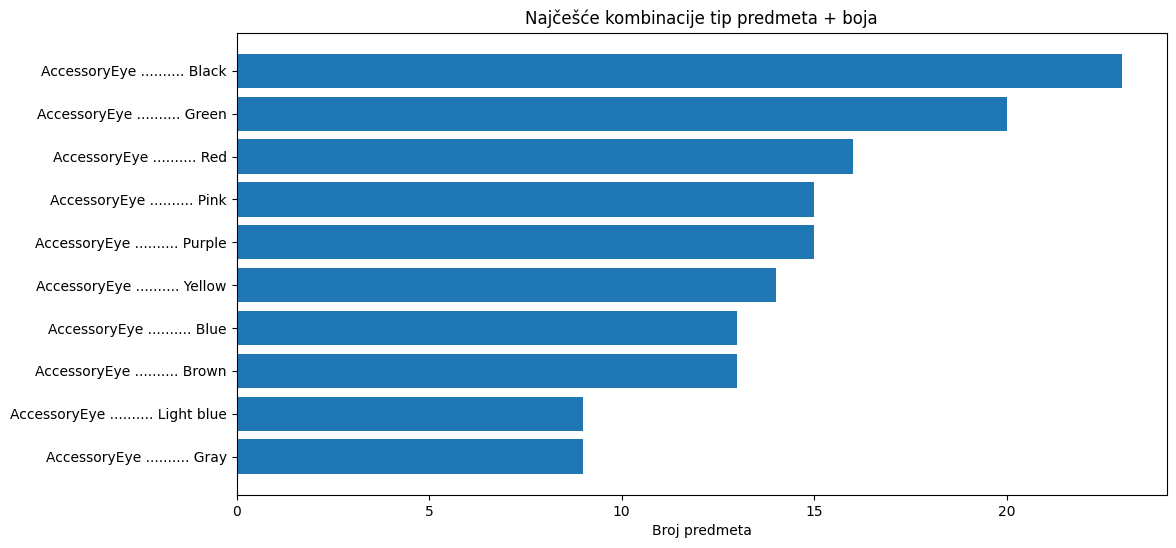

In [233]:
plt.figure(figsize=(12,6))
plt.barh(labels, counts)
plt.xlabel("Broj predmeta")
plt.title("Najčešće kombinacije tip predmeta + boja")
plt.gca().invert_yaxis()
plt.show()

**Komentar:**

Nakon spajanja tipa i boje predmeta u jedan string i pretrazivanja ucestalosti te kombinacije, vidimo da je najzastupljeniji predmet "Accessory eye" u crnoj boji. To znaci da taj predmet ima najvise varijacija, dakle moze imati razlicitu drugu boju, nekakav pattern ili customize opciju - ali s tim da tip i boja ostaju isti. Isto vrijedi i za ostale boje, taj je predmet najzastupljeniji, ali u crnoj boji nudi najvise varijacija.

## **6. Outlieri**

>**Postoje li outlieri koji znacajno odskacu cijenom ili nekim drugim karakteristikama?**

>1. Outlieri u cijeanama

In [234]:
stats

,Buy_numeric
count,4671.000000
mean,8971.076857
std,26193.216930
min,40.000000
25%,1000.000000
50%,1800.000000
75%,4400.000000
max,260000.000000


In [235]:
unique_items_prices = (
    all_items_prices
    .dropna(subset=["Buy_numeric"])
    .drop_duplicates(subset=["Name"])
    .copy()
)

Q1 = unique_items_prices["Buy_numeric"].quantile(0.25)
Q3 = unique_items_prices["Buy_numeric"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

price_outliers = (
    unique_items_prices
    [unique_items_prices["Buy_numeric"] > upper_bound]
    .sort_values("Buy_numeric", ascending=False)
)

price_outliers[["Name", "Buy_numeric"]].head(10)

,Name,Buy_numeric
1196,grand piano,260000.0
822,elaborate kimono stand,220000.0
1410,kitchen island,170000.0
1871,open-frame kitchen,140000.0
2387,screen,140000.0
3445,hanging scroll,140000.0
10026,fancy violin,140000.0
1240,harp,130000.0
2680,system kitchen,130000.0
2942,whirlpool bath,130000.0


**Komentar:**

Vec smo ranije racunali osnovnu deskriptivnu statistiku, i po kvartilima se dalo zakljuciti da postoje veliki outlieri. daljnjom analizom vidimo kako je to vec spomenuti klavir, kimono stand, kitchen island, i tako dalje - svi odskacu znatno po svojoj cijeni.

> Outlieri kod villagera

In [236]:
species_count

,count
Species,
Cat,23
Rabbit,20
Squirrel,18
Frog,18
Duck,17
Dog,16
Cub,16
Bear,15
Pig,15


In [237]:
rare_species = species_count.tail(1)
rare_species

,count
Species,
Octopus,3


In [238]:
rare_villagers = villagers[villagers["Species"].isin(rare_species.index)]
rare_villagers[["Name", "Species", "Personality", "Gender", "Color 1", "Color 2"]]

,Name,Species,Personality,Gender,Color 1,Color 2
227,Marina,Octopus,Normal,Female,Pink,Red
254,Octavian,Octopus,Cranky,Male,Black,White
390,Zucker,Octopus,Lazy,Male,Blue,Yellow


**Komentar:**

Ranije smo istrazili zastupljenost villagera po vrsti i mogli vidjeti kako je "octopus" najrijeđa vrsta u igri. ispisivanjem nekih stupaca tih villagera mozemo vidjeti vise informacija o njima.

> Outlieri kod insekata

In [241]:
insects = datasets["insects"]
insects.head(1)

,#,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,...,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,NaN,NaN,NaN,...,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green,Ins6,InsectMiirotateha,FtrInsectMiirotateha,620,aj95rMzdbSbvZy9A2


In [243]:
months = [
    "NH Jan", "NH Feb", "NH Mar", "NH Apr", "NH May", "NH Jun",
    "NH Jul", "NH Aug", "NH Sep", "NH Oct", "NH Nov", "NH Dec"
]

insects = insects.copy()
insects["months_available"] = insects[months].notna().sum(axis=1)

def format_to_24h(hour, period):
    hour = int(hour)
    if period == "PM" and hour != 12:
      hour += 12
    if period == "AM" and hour == 12:
      hour = 0
    return hour

def hours_available(time):
  if pd.isna(time):
    return 0

  time = str(time)
  if "All day" in time:
    return 24

  match = re.findall(r"(\d+) (AM|PM)", time)
  start = format_to_24h(*match[0])
  end = format_to_24h(*match[1])

  if start < end:
    return end - start
  else:
    return (24 - start) + end


def average_daily_hours(row):
  hours = []
  for m in months:
    if pd.notna(row[m]):
      hours.append(hours_available(row[m]))
  return sum(hours) / len(hours)

insects["avg_daily_hours"] = insects.apply(average_daily_hours, axis=1)
price_normalized = insects["Sell"] / insects["Sell"].max()

insects["rarity_score"] = ((12 - insects["months_available"])*2 + (24 - insects["avg_daily_hours"]) + price_normalized*5)
rare_insects = insects.sort_values("rarity_score", ascending=False)

rare_insects[["Name", "Sell", "months_available", "avg_daily_hours", "rarity_score"]].head(10)

,Name,Sell,months_available,avg_daily_hours,rarity_score
22,evening cicada,550,2,4.0,40.229167
27,giant stag,10000,2,9.0,39.166667
65,scarab beetle,10000,2,9.0,39.166667
23,firefly,300,1,9.0,37.125000
26,giant cicada,500,2,9.0,35.208333
74,walker cicada,400,2,9.0,35.166667
62,robust cicada,300,2,9.0,35.125000
7,brown cicada,250,2,9.0,35.104167
76,walking stick,600,5,4.0,34.250000
39,horned hercules,12000,2,15.0,34.000000


Broj outliera: 4
                Name  months_available  avg_daily_hours  Sell
22    evening cicada                 2              4.0   550
76     walking stick                 5              4.0   600
12  common butterfly                10             15.0   160
55          pill bug                10             17.0   250


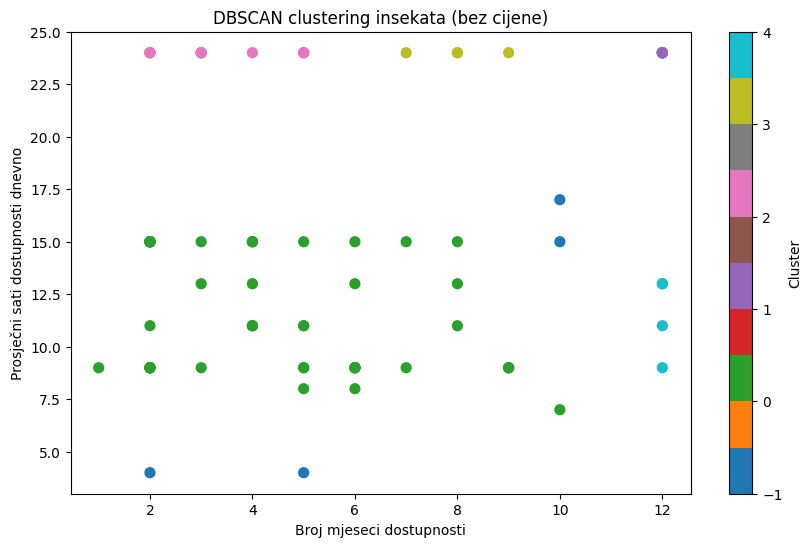

In [244]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(insects[["months_available", "avg_daily_hours"]])

dbscan = DBSCAN(eps=0.15, min_samples=3)
clusters = dbscan.fit_predict(features_scaled)
rare_insects_dbscan = insects[clusters == -1]

print(f"Broj outliera: {rare_insects_dbscan.shape[0]}")
print(rare_insects_dbscan[["Name","months_available","avg_daily_hours","Sell"]].sort_values("months_available"))

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    insects["months_available"],
    insects["avg_daily_hours"],
    c=clusters,
    cmap="tab10",
    s=50
)
plt.xlabel("Broj mjeseci dostupnosti")
plt.ylabel("Prosječni sati dostupnosti dnevno")
plt.title("DBSCAN clustering insekata (bez cijene)")
plt.colorbar(scatter, label="Cluster")
plt.show()


**Komentar:**

Outlieri bi trebali predstavljati insekte koji odskacu od drugih, a u igri se zapravo radi o vrlo rijetkim insektima, primjerice onima koji se pojavljuju samo u odredenim godisnjim dobima. Izradom DBSCANA vidjeli smo da se i nisu bas najbolje izvukli trazeni podaci, a razlog tome je homogena rasporedenost predmeta po grafu. Prevelika strukturiranost rezultira time da model tesko pronalazi "nakupine" odnonsno clustere, i moze doci do neocekivano "nasumicnih" razmaka. Zato je u ovom slucaju bolje osloniti se na izracun prije DBSCANA gdje su pronadeni pravi outlieri. Tijekom tog izracuna, u obzir sam uzela pojavu insekata kroz mjesece, dnevnu aktivnost te skaliranu cijenu prodaje. Sukladno rezultatima tog izracuna, mozemo primijetiti kako postoje zaista rijetki insekti u igri s jako malo zastupljenosti ili po dosta vecoj prodajnoj cijeni.

## **7. Zaključak**

histogram trebam za nesto, i provjerit jel sve okej, treba li negdi jos vizualizacije dodat

**Iz analize, sukladno postavljenim pitanjima na pocetku projekta zakljucuje se sljedece:**
1. neke su vrste villagera i osobnosti zastupljenije od drugih, i vise je muskaraca
2. odreden spol ima zastupljenije osobnosti i hobije
3. najvise je likova rodeno u listopadu
4. vrste predmeta najzastupljenije u igri su pretezito kucanski predmeti
5. prosjek cijena kupnje je skoro 9000 bells, dok je medijan samo cca 1800 bells, sto nas je uputilo na predmete poput klavira koji odskacu cijenom do cak 260000 bells
6. izdvojili smo predmete najneisplativije za prodaju - za neke se dobije okvirno cak 4 puta manje novca u odnosu na kupovnu cijenu
7. predmeti su vecinom bijele ili crne temeljne boje
8. postoje grupe likova koji su slicni na temelju svojih osobnosti, hobija te spola i vrste.
9. postoje odredene kombinacije predmeta i boja koje su najzastupljenije, odnonso dolaze u najvise varijacija
10. kod entiteta kao sto su insekti i ribe ocekivano je postojanje outliera zato sto se u igri takvi entiteti pojavljuju ovisno o sezoni i dijelu dana, a takoder i nose razlicitu prodajnu vrijednost - mi smo izdvojili neke insekte koje mozemo istaknuti kao rijetke pojave

*Tijekom obrade ovih pitanja koristene su tehnologije: EDA, osnove NLP-a, K-means algoritam, DBSCAN algoritam*

